In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Load the dataset from CSV file
projectPath_save = projectPath_save = "./save/"
projectPath = "./data/"
file_path = projectPath+ "timeVideo1.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,TIME,behaviour
0,00:00:00,NaN
1,00:00:15,NaN
2,00:00:30,NaN
3,00:00:45,NaN
4,00:01:00,NaN
...,...,...
4669,19:27:15,NaN
4670,19:27:30,NaN
4671,19:27:45,NaN
4672,19:28:00,NaN


**Remove sequences of same behaviour**

In [ ]:
df['behaviour_next'] = df['behaviour'].shift(-1)
df = df[df['behaviour'] != df['behaviour_next']]
df = df.drop('behaviour_next', axis=1)


In [ ]:
df

,TIME,behaviour
0,00:00:00,NaN
1,00:00:15,NaN
2,00:00:30,NaN
3,00:00:45,NaN
4,00:01:00,NaN
...,...,...
4669,19:27:15,NaN
4670,19:27:30,NaN
4671,19:27:45,NaN
4672,19:28:00,NaN


In [ ]:
##Remove NaN
df = df[df['behaviour'].notna()]

In [ ]:
print(df)

          TIME behaviour
20    00:05:00   NIP_OUT
45    00:11:15        BN
58    00:14:30      LAND
97    00:24:15       FAN
99    00:24:45       MAN
...        ...       ...
4610  19:12:30      BEND
4613  19:13:15  DAN_CIRC
4625  19:16:15  NIP_CORE
4637  19:19:15      INSF
4646  19:21:30  NIP_CORE

[301 rows x 2 columns]


In [ ]:
# Calculate transitions
transitions = list(zip(df['behaviour'], df['behaviour'].shift(-1)))
transitions = [t for t in transitions if pd.notnull(t[1])]

In [ ]:
transitions

[('NIP_OUT', 'BN'),
 ('BN', 'LAND'),
 ('LAND', 'FAN'),
 ('FAN', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'FAN'),
 ('FAN', 'MAN'),
 ('MAN', 'FAN'),
 ('FAN', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'NIP_CORE'),
 ('NIP_CORE', 'FAN'),
 ('FAN', 'NIP_IN'),
 ('NIP_IN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'SA'),
 ('SA', 'NIP_OUT'),
 ('NIP_OUT', 'NIP_OUT'),
 ('NIP_OUT', 'AM'),
 ('AM', 'LAND'),
 ('LAND', 'NIP_IN'),
 ('NIP_IN', 'NIP_IN'),
 ('NIP_IN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'SA'),
 ('SA', 'SA'),
 ('SA', 'BN'),
 ('BN', 'LAND'),
 ('LAND', 'ROLL'),
 ('ROLL', 'INSF'),
 ('INSF', 'NIP_CORE'),
 ('NIP_CORE', 'LF'),
 ('LF', 'H_UP'),
 ('H_UP', 'LF'),
 ('LF', 'FAN'),
 ('FAN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'NIP_IN'),
 ('NIP_IN', 'AM'),
 ('AM', 'NIP_IN'),
 ('NIP_IN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'NIP_IN'),
 ('NIP_IN', 'SA'),
 ('S

In [ ]:
# Find all unique behaviours
unique_behaviors = df['behaviour'].unique()
print(unique_behaviors)
print(len(unique_behaviors))

['NIP_OUT' 'BN' 'LAND' 'FAN' 'MAN' 'NIP_IN' 'NIP_CORE' 'SA' 'AM' 'ROLL'
 'INSF' 'LF' 'H_UP' 'UP' 'BK_SW' 'H_DOWN' 'FS' 'SHAK' 'DAN_CIRC' 'BEND'
 'MAF' 'GB' 'CHASE_FLEE' 'CIRC' 'BEND_OPP' 'SPA']
26


In [ ]:
# Initialize transition matrix
transition_matrix = pd.DataFrame(0, index=unique_behaviors, columns=unique_behaviors)

In [ ]:
# Fill transition matrix
for (current_behavior, next_behavior) in transitions:
    transition_matrix.loc[current_behavior, next_behavior] += 1

In [ ]:
transition_matrix

,NIP_OUT,BN,LAND,FAN,MAN,NIP_IN,NIP_CORE,SA,AM,ROLL,...,SHAK,DAN_CIRC,BEND,MAF,GB,CHA/flee,FA,CIRC,BEND_OPP,SPA
NIP_OUT,3,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
BN,0,0,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
LAND,0,0,1,2,0,2,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
FAN,0,0,0,1,3,3,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
MAN,0,0,0,2,1,9,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
NIP_IN,0,0,0,1,10,24,4,4,2,2,...,0,0,0,1,0,0,0,0,0,0
NIP_CORE,0,0,0,1,1,4,6,0,0,5,...,0,1,2,1,0,0,0,1,0,0
SA,2,2,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
AM,0,0,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ROLL,0,0,1,0,0,0,1,0,0,1,...,1,0,2,0,0,0,0,0,1,0


In [ ]:
# Normalize matrix to get probabilities
transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

In [ ]:
transition_matrix_normalized

,NIP_OUT,BN,LAND,FAN,MAN,NIP_IN,NIP_CORE,SA,AM,ROLL,...,SHAK,DAN_CIRC,BEND,MAF,GB,CHA/flee,FA,CIRC,BEND_OPP,SPA
NIP_OUT,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000
BN,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000
LAND,0.000000,0.000000,0.100000,0.200000,0.000000,0.200000,0.200000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000
FAN,0.000000,0.000000,0.000000,0.111111,0.333333,0.333333,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.111111,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000
MAN,0.000000,0.000000,0.000000,0.125000,0.062500,0.562500,0.062500,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.062500,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000
NIP_IN,0.000000,0.000000,0.000000,0.020408,0.204082,0.489796,0.081633,0.081633,0.040816,0.040816,...,0.000000,0.000000,0.000000,0.020408,0.000000,0.000,0.0,0.00,0.000000,0.000000
NIP_CORE,0.000000,0.000000,0.000000,0.040000,0.040000,0.160000,0.240000,0.000000,0.000000,0.200000,...,0.000000,0.040000,0.080000,0.040000,0.000000,0.000,0.0,0.04,0.000000,0.000000
SA,0.285714,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000
AM,0.000000,0.000000,0.400000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.2,0.00,0.000000,0.000000
ROLL,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,...,0.071429,0.000000,0.142857,0.000000,0.000000,0.000,0.0,0.00,0.071429,0.000000


**Visualize transition matrix for all behaviours**

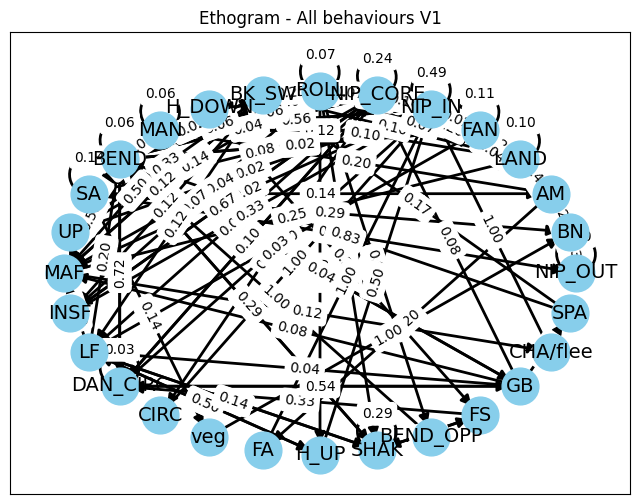

In [ ]:
# Create graph
G = nx.DiGraph()

# Add nodes and arches with weights
for i in range(len(transition_matrix_normalized)):
    for j in range(len(transition_matrix_normalized.columns)):
        if transition_matrix_normalized.iloc[i, j] > 0:
            G.add_edge(transition_matrix_normalized.index[i],
                       transition_matrix_normalized.columns[j],
                       weight=transition_matrix_normalized.iloc[i, j])

# Define layout
pos = nx.circular_layout(G)
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw arches
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=15)

# Draw labels at nodes
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Draw labels at arches
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Ethogram - All behaviours V1')
plt.show()


**select behaviours of interest**

In [ ]:
# Define the behaviors of interest for ethogram and Markov chain
behaviors_of_interest = ['BEND', 'DAN_CIRC', 'GB', 'SPA']

**Filter normalized matrix**

In [ ]:
# Filter normalized matrix for behaviour of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[behaviors_of_interest, behaviors_of_interest]

print(filtered_transition_matrix_normalizedBI)


              BEND  DAN_CIRC        GB       SPA
BEND      0.063830  0.255319  0.489362  0.000000
DAN_CIRC  0.724138  0.034483  0.103448  0.000000
GB        0.038462  0.538462  0.000000  0.230769
SPA       0.833333  0.000000  0.000000  0.000000


**Slightly different visualizations to choose from**

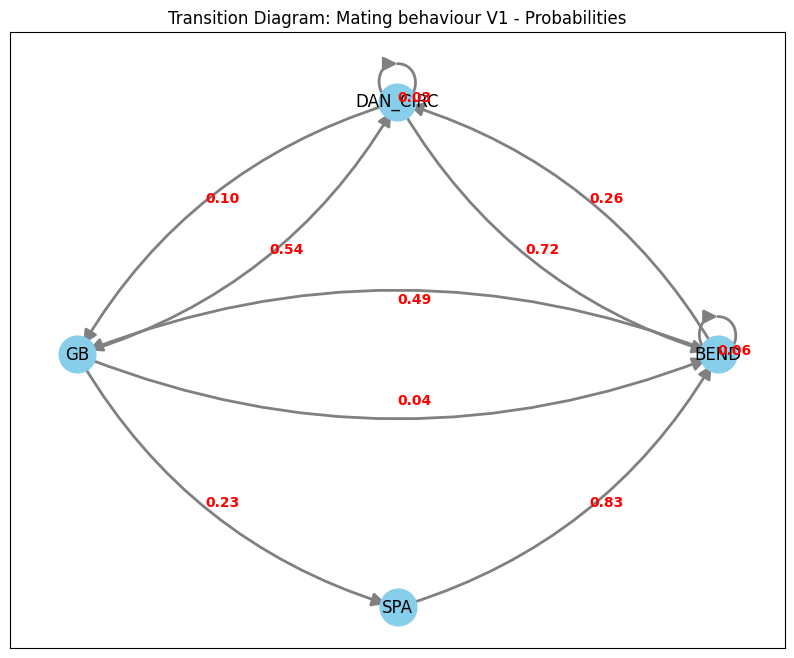

In [ ]:
# Graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # add arch with weight (transition probability)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Position circular nodes
pos_filtered = nx.circular_layout(G_filtered)


plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Draw curving arches and arrow points
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modify position to draw curving arches
    rad = 0.2 if u != v else 0.0  # rad=0.2 for curve, rad=0 for self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Add labels to nodes
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Add labels to arches with probability
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calculate mean position between strating and ending nodes
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Apply shift to avoid overlapping
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Title
plt.title('Transition Diagram: Mating behaviour V1 - Probabilities')
#save
#plt.savefig(projectPath_save + '01MatingBehaviourV1.png')
#plt.savefig(projectPath_save + '01MatingBehaviourV1.svg')

plt.show()


/tmp/ipython-input-16-751687289.py:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


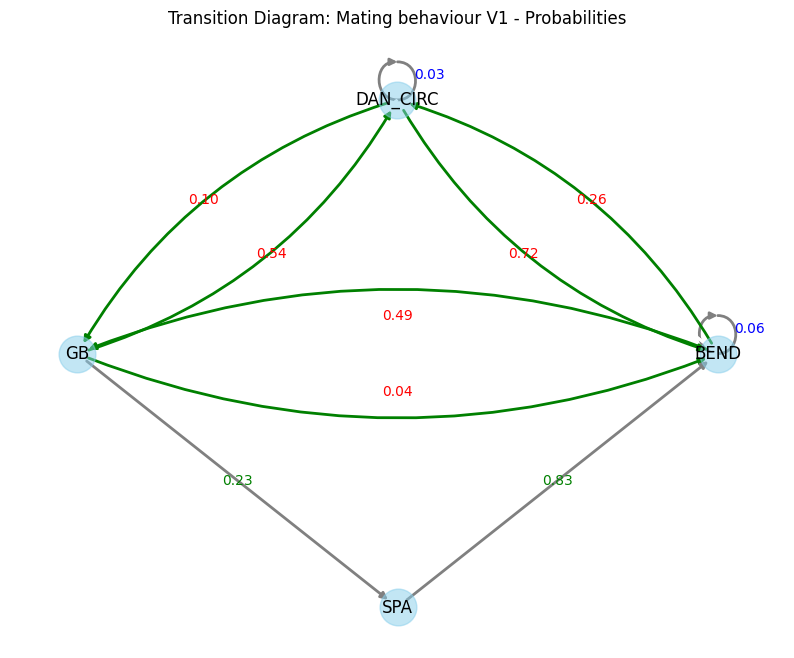

In [ ]:
# Graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:

            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)


pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

i
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)


for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',
                               connectionstyle='arc3,rad=-0.2')
    else:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')


nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Label arches
for (u, v), label in edge_labels.items():
    if u == v:  # Check for self-loop
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Check for two-direction arches
            # label for bending arch u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.15 * np.sin(np.radians(angle)), y - 0.15 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # label for one-direction arch
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='green', ha='center', va='center')


plt.title('Transition Diagram: Mating behaviour V1 - Probabilities')
plt.axis('off')  # Deactivate axis

# Save
plt.savefig(projectPath_save + '02MatingBehaviourV1.png')
#plt.savefig(projectPath_save + '02MatingBehaviourV1.pdf')
plt.savefig(projectPath_save + '02MatingBehaviourV1.svg')

plt.show()




**Grouping behaviours for categories**

**COURTSHIP**

In [ ]:
Courtship_all = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'LF', 'BK_SW', 'BEND_OPP', 'H_DOWN', 'H_UP', 'MAF', 'UP', 'INSF']


In [ ]:
# Filter matrix on behaviours of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_all, Courtship_all]

print(filtered_transition_matrix_normalizedBI)


              BEND  DAN_CIRC      ROLL        GB        LF     BK_SW  \
BEND      0.063830  0.255319  0.063830  0.489362  0.000000  0.021277   
DAN_CIRC  0.724138  0.034483  0.000000  0.103448  0.000000  0.000000   
ROLL      0.142857  0.000000  0.071429  0.000000  0.000000  0.214286   
GB        0.038462  0.538462  0.000000  0.000000  0.038462  0.000000   
LF        0.200000  0.000000  0.000000  0.000000  0.000000  0.000000   
BK_SW     0.125000  0.000000  0.250000  0.000000  0.125000  0.000000   
BEND_OPP  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
H_DOWN    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
H_UP      0.000000  0.000000  0.000000  0.000000  0.500000  0.000000   
MAF       0.500000  0.000000  0.000000  0.000000  0.000000  0.125000   
UP        0.666667  0.000000  0.000000  0.000000  0.000000  0.333333   
INSF      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          BEND_OPP  H_DOWN      H_UP       MAF        UP      I

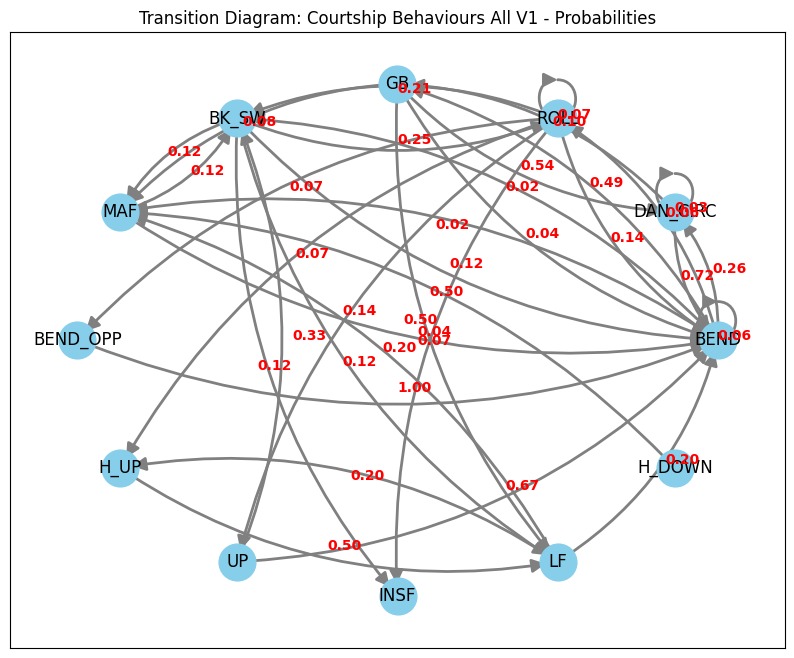

In [ ]:
# Graph
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Courtship Behaviours All V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '01Courtship_allV1.png')

# Mostra il grafico
plt.show()


<ipython-input-26-13db3b24b43c>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


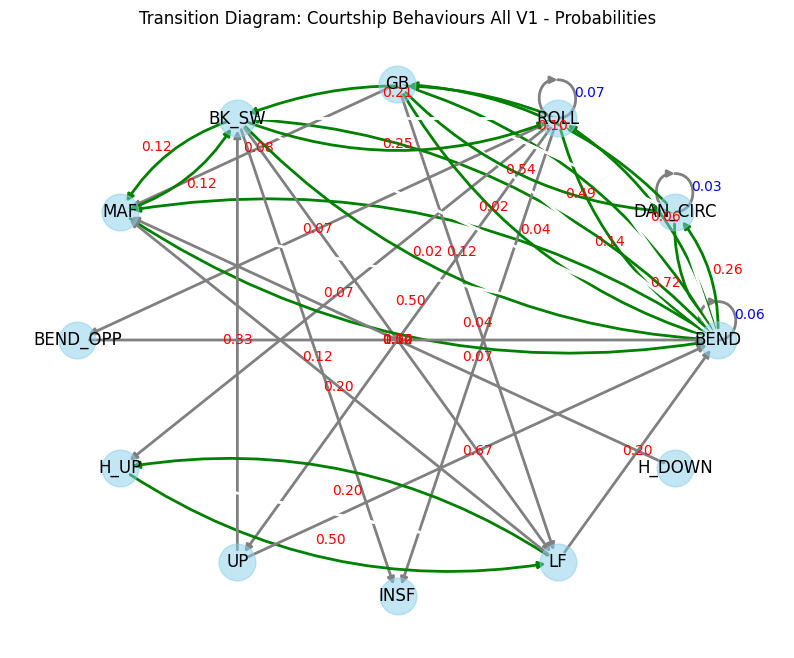

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo del grafico
plt.title('Transition Diagram: Courtship Behaviours All V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Courtship_allV1.png')

# Mostra il grafico
plt.show()


In [ ]:
Courtship_few = ['BEND', 'LF', 'ROLL']          #'DAN_CIRC', 'GB',  'INSF' , 'NIP_CORE',

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_few, Courtship_few]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


          BEND   LF      ROLL
BEND  0.063830  0.0  0.063830
LF    0.200000  0.0  0.000000
ROLL  0.142857  0.0  0.071429


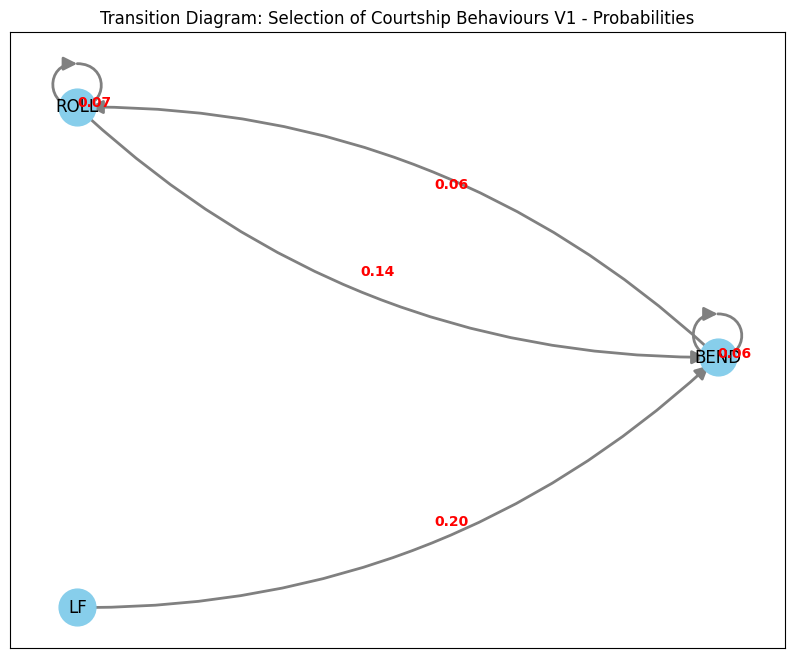

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Selection of Courtship Behaviours V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '01Courtship_fewV1.png')
#plt.savefig(projectPath_save + '01Courtship_fewV1.svg')

# Mostra il grafico
plt.show()


<ipython-input-30-ff09e91beffc>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


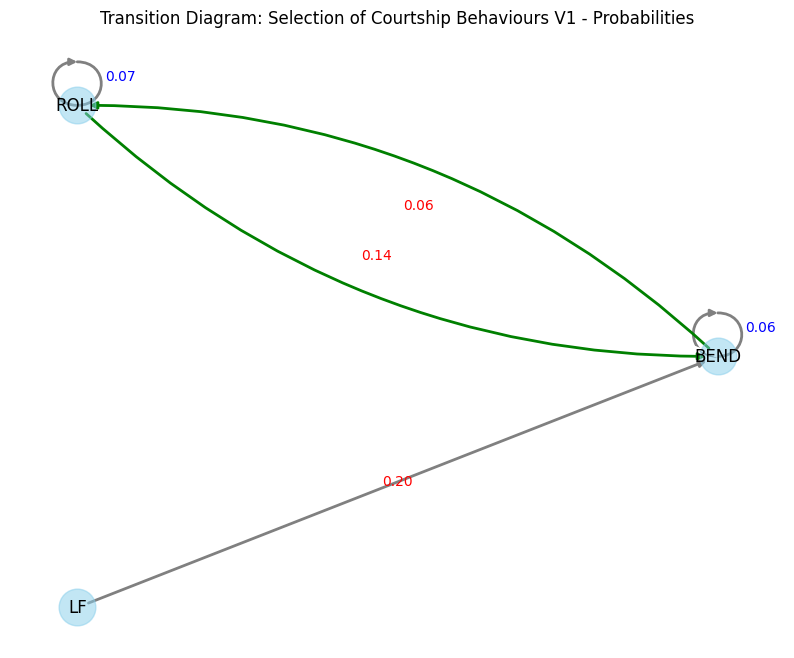

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Selection of Courtship Behaviours V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#plt.savefig(projectPath_save + '02courtship_fewV1.png')
#plt.savefig(projectPath_save + '02courtship_fewV1.pdf')
#plt.savefig(projectPath_save + '02courtship_fewV1.svg')
plt.show()  # Mostra il grafo




# **COMPARE GRAFIC RESULT**

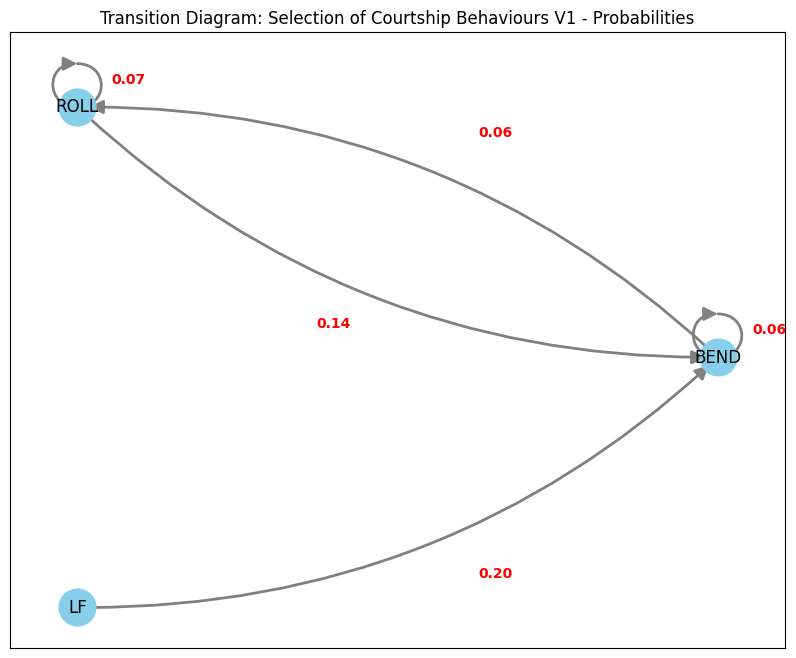

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.08
        y_pos = pos_filtered[u][1] + 0.08
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.22
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Selection of Courtship Behaviours V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '03courtship_fewV1.png')
#plt.savefig(projectPath_save + '03courtship_fewV1.pdf')
#plt.savefig(projectPath_save + '03courtship_fewV1.svg')

# Mostra il grafico
plt.show()


**Nest_mantainance**

In [ ]:
Nest_mantainance = ['SA', 'NIP_OUT', 'NIP_IN', 'BN', 'AM', 'LAND', 'MAN' ]

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Nest_mantainance, Nest_mantainance]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


               SA   NIP_OUT    NIP_IN        BN        AM  LAND       MAN
SA       0.142857  0.285714  0.000000  0.285714  0.142857   0.0  0.000000
NIP_OUT  0.000000  0.500000  0.000000  0.333333  0.166667   0.0  0.000000
NIP_IN   0.081633  0.000000  0.489796  0.000000  0.040816   0.0  0.204082
BN       0.000000  0.000000  0.000000  0.000000  0.200000   0.8  0.000000
AM       0.000000  0.000000  0.200000  0.000000  0.000000   0.4  0.200000
LAND     0.000000  0.000000  0.200000  0.000000  0.000000   0.1  0.000000
MAN      0.125000  0.000000  0.562500  0.000000  0.000000   0.0  0.062500


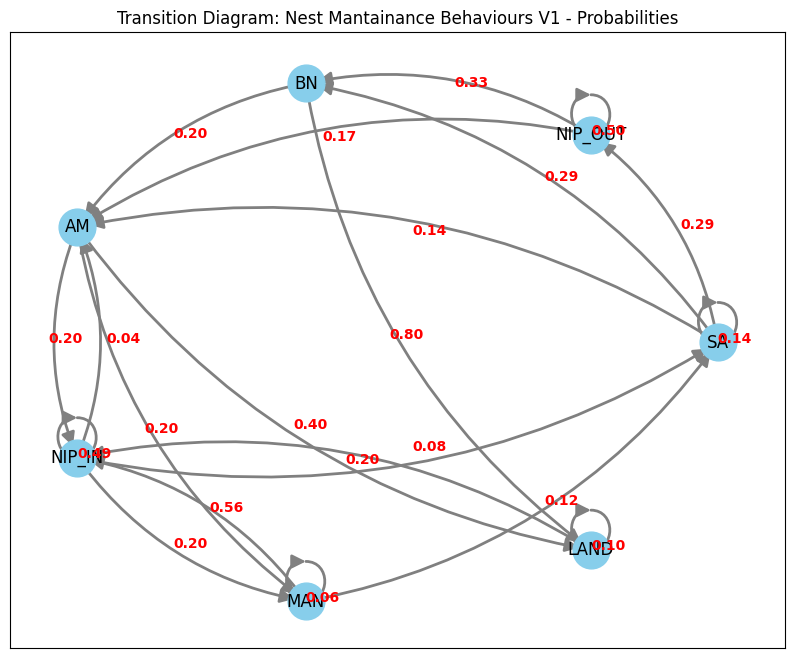

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Nest Mantainance Behaviours V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '01Nest_mantainanceV1.png')
#plt.savefig(projectPath_save + '01Nest_mantainanceV1.pdf')
#plt.savefig(projectPath_save + '01Nest_mantainanceV1.svg')

# Mostra il grafico
plt.show()



<ipython-input-35-a8b884d023f9>:29: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


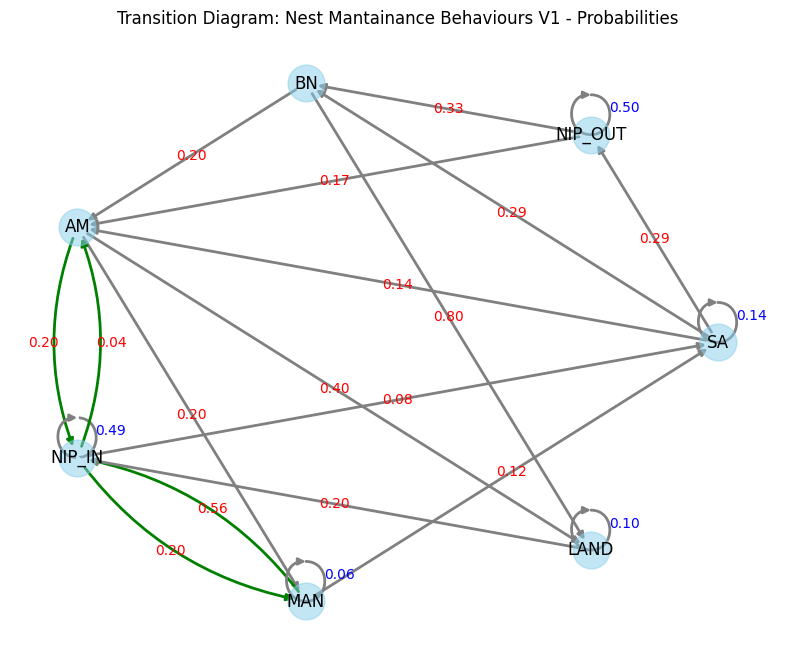

In [ ]:

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo del grafico
plt.title('Transition Diagram: Nest Mantainance Behaviours V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Nest_mantainanceV1.png')
#plt.savefig(projectPath_save + '02Nest_mantainanceV1.pdf')
#plt.savefig(projectPath_save + '02Nest_mantainanceV1.svg')

# Mostra il grafico
plt.show()


**Selection nest mantainace**

In [ ]:
Nest_mantainanceRID = ['SA', 'NIP_OUT', 'NIP_IN', 'BN', 'AM', 'NIP_CORE' ]

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Nest_mantainanceRID, Nest_mantainanceRID]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


                SA   NIP_OUT    NIP_IN        BN        AM  NIP_CORE
SA        0.142857  0.285714  0.000000  0.285714  0.142857  0.000000
NIP_OUT   0.000000  0.500000  0.000000  0.333333  0.166667  0.000000
NIP_IN    0.081633  0.000000  0.489796  0.000000  0.040816  0.081633
BN        0.000000  0.000000  0.000000  0.000000  0.200000  0.000000
AM        0.000000  0.000000  0.200000  0.000000  0.000000  0.000000
NIP_CORE  0.000000  0.000000  0.160000  0.000000  0.000000  0.240000


<ipython-input-38-32c80150c9d1>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


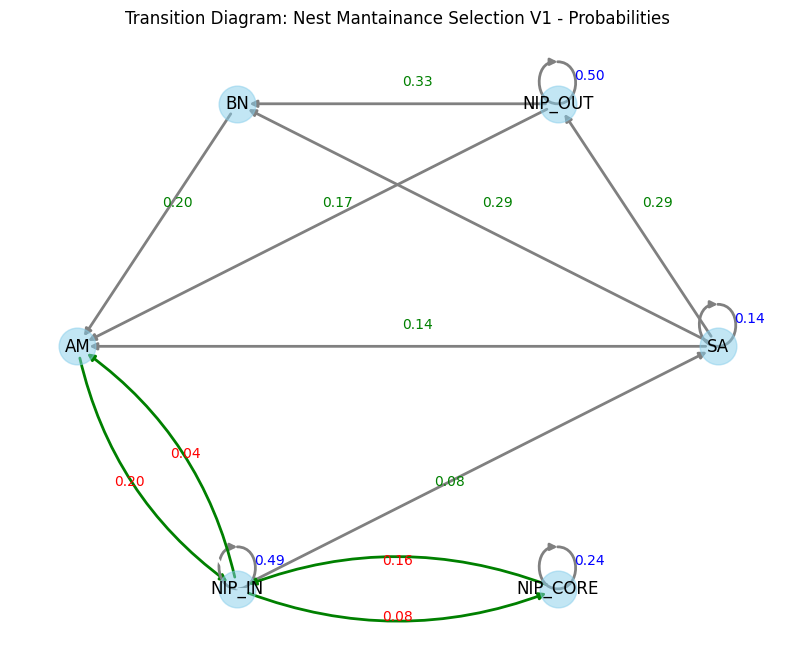

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1])/2 - 0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Nest Mantainance Selection V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV1.png')
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV1.pdf')
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV1.svg')

# Mostra il grafico
plt.show()


**Egg_care**

In [ ]:
Egg_care = ['FAN', 'NIP_CORE', 'INSF']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Egg_care, Egg_care]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


               FAN  NIP_CORE  INSF
FAN       0.111111  0.111111  0.00
NIP_CORE  0.040000  0.240000  0.04
INSF      0.000000  0.666667  0.00


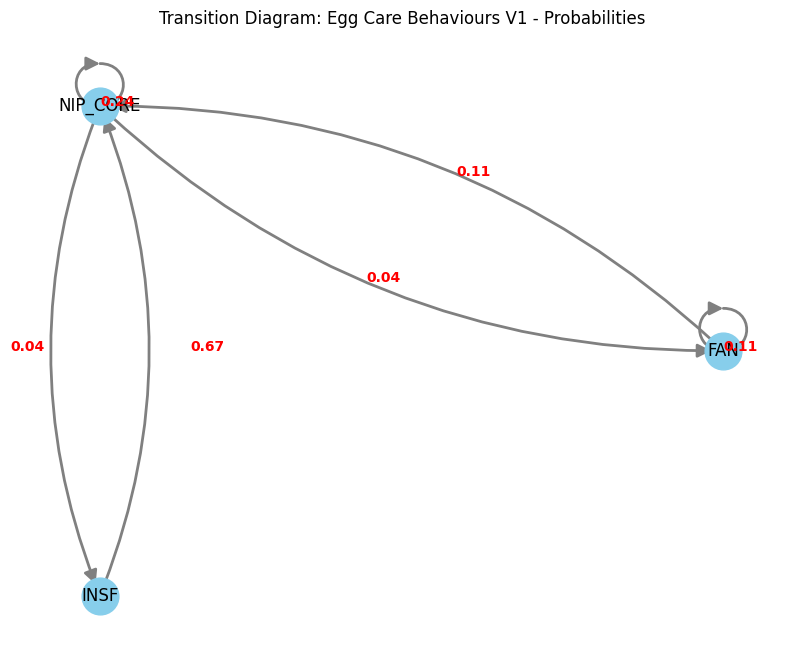

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.125
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi
#save
#plt.savefig(projectPath_save + '01Egg_careV1.png')
#plt.savefig(projectPath_save + '01Egg_careV1.pdf')
#plt.savefig(projectPath_save + '01Egg_careV1.svg')

# Mostra il grafico
plt.show()



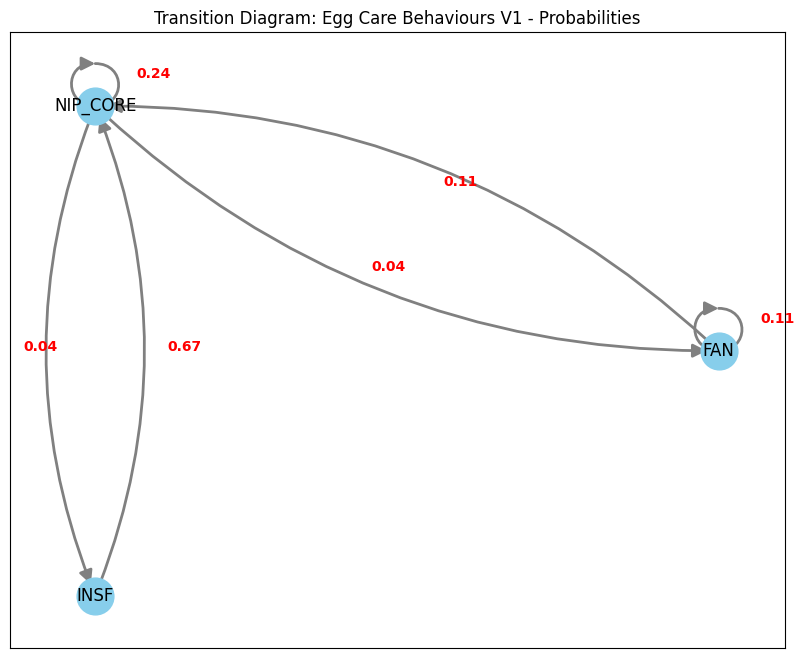

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.1
        y_pos = pos_filtered[u][1] + 0.1
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
        offset = 0.1
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '02Egg_careV1.png')
#plt.savefig(projectPath_save + '02Egg_careV1.pdf')
#plt.savefig(projectPath_save + '02Egg_careV1.svg')

# Mostra il grafico
plt.show()


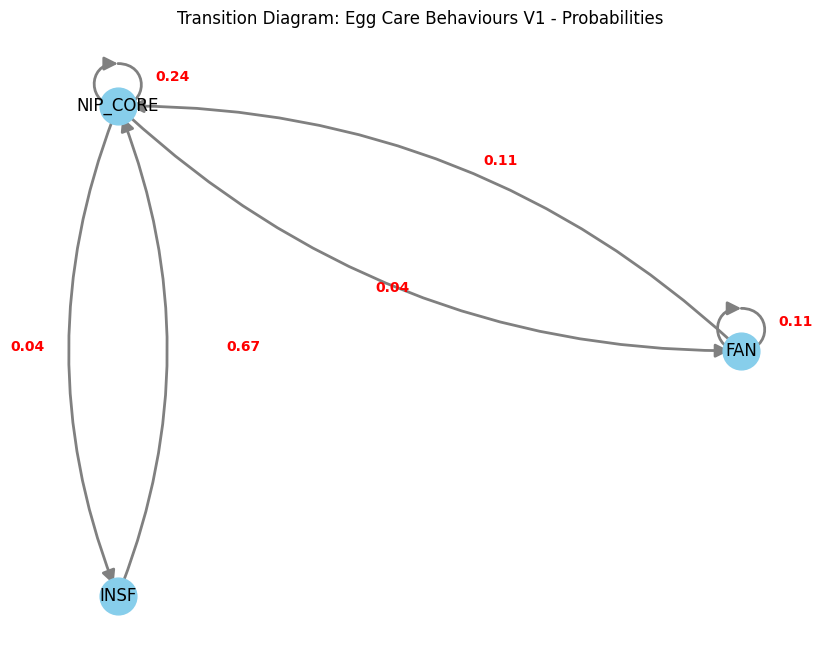

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.09
        y_pos = pos_filtered[u][1] + 0.09
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.15
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi
#save
#plt.savefig(projectPath_save + '03Egg_careV1.png')
#plt.savefig(projectPath_save + '03Egg_careV1.pdf')
#plt.savefig(projectPath_save + '03Egg_careV1.svg')

# Mostra il grafico
plt.show()


<ipython-input-46-b5c1bb03d39e>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


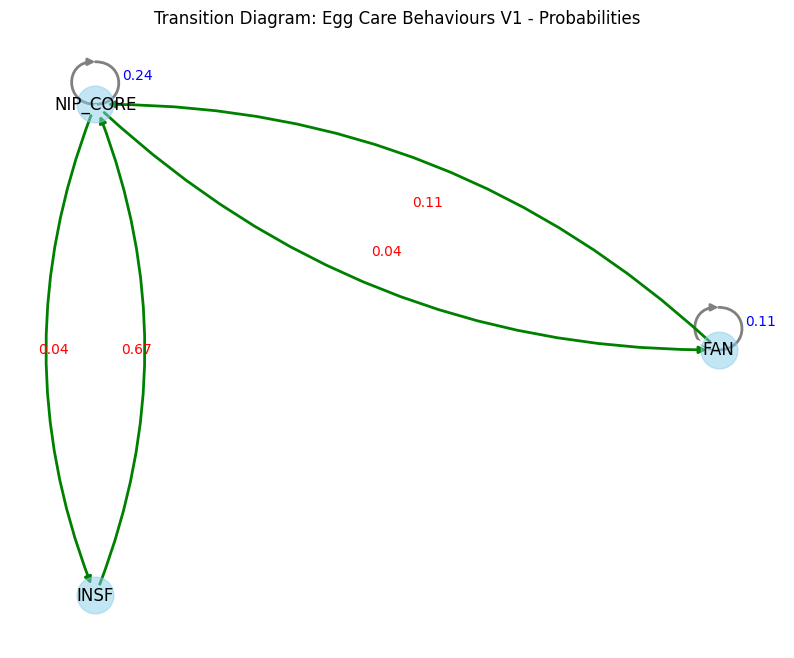

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Egg Care Behaviours V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '04Egg_careV1.png')
#plt.savefig(projectPath_save + '04Egg_careV1.pdf')
#plt.savefig(projectPath_save + '04Egg_careV1.svg')

plt.axis('off')  # Disattiva gli assi

plt.show()  # Mostra il grafo




**Agonism**

In [ ]:
Agonism = ['CHA/flee', 'MAF']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Agonism, Agonism]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


          CHA/flee  MAF
CHA/flee     0.000  0.0
MAF          0.125  0.0


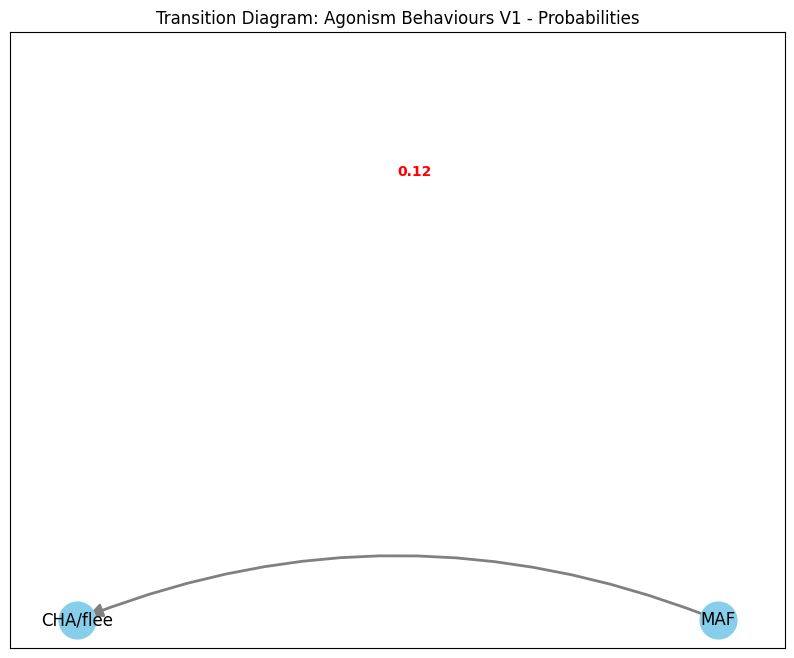

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Agonism Behaviours V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '01AgonismV1.png')
#plt.savefig(projectPath_save + '01AgonismV1.pdf')
#plt.savefig(projectPath_save + '01AgonismV1.svg')

# Mostra il grafico
plt.show()


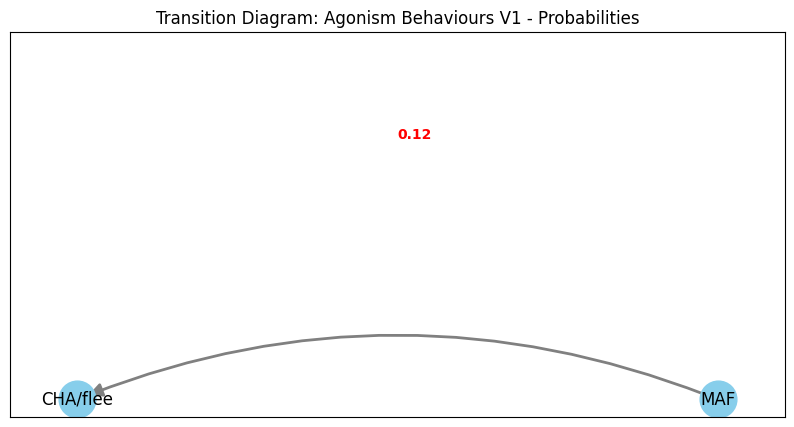

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 5))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.09
        y_pos = pos_filtered[u][1] + 0.09
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.15
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Agonism Behaviours V1 - Probabilities')

#save
#plt.savefig(projectPath_save + '01AgonismV1.png')
#plt.savefig(projectPath_save + '01AgonismV1.pdf')
#plt.savefig(projectPath_save + '01AgonismV1.svg')

# Mostra il grafico
plt.show()

